# Load Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# df = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
df = pd.read_csv('../dataset/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Exploratory Data Analysis

In [3]:
df.shape

(12330, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
df.duplicated().sum()

125

In [8]:
categorical_cols = df.loc[:, (df.dtypes == 'object') | (df.dtypes == 'bool')].columns.tolist()
print(categorical_cols)
print('Counts :', len(categorical_cols))

numerical_cols = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
print(numerical_cols)
print('Counts :', len(numerical_cols))

['Month', 'VisitorType', 'Weekend', 'Revenue']
Counts : 4
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Counts : 14


In [9]:
print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("="*50)

for col in categorical_cols:
    unique_values = df[col].unique()
    unique_count = df[col].nunique()
    
    print(f"\n{col}:")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}")
    
    if unique_count > 10:
        print(f"  First 10 values: {unique_values[:10]}")
    
    print(f"  Value counts:")
    value_counts = df[col].value_counts()
    if len(value_counts) <= 10:
        for value, count in value_counts.items():
            print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print("    Top 5 most frequent:")
        for value, count in value_counts.head(5).items():
            print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")

UNIQUE VALUES IN CATEGORICAL COLUMNS

Month:
  Number of unique values: 10
  Unique values: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
  Value counts:
    May: 3364 (27.3%)
    Nov: 2998 (24.3%)
    Mar: 1907 (15.5%)
    Dec: 1727 (14.0%)
    Oct: 549 (4.5%)
    Sep: 448 (3.6%)
    Aug: 433 (3.5%)
    Jul: 432 (3.5%)
    June: 288 (2.3%)
    Feb: 184 (1.5%)

VisitorType:
  Number of unique values: 3
  Unique values: ['Returning_Visitor' 'New_Visitor' 'Other']
  Value counts:
    Returning_Visitor: 10551 (85.6%)
    New_Visitor: 1694 (13.7%)
    Other: 85 (0.7%)

Weekend:
  Number of unique values: 2
  Unique values: [False  True]
  Value counts:
    False: 9462 (76.7%)
    True: 2868 (23.3%)

Revenue:
  Number of unique values: 2
  Unique values: [False  True]
  Value counts:
    False: 10422 (84.5%)
    True: 1908 (15.5%)


In [10]:
print("UNIQUE VALUES IN NUMERICAL COLUMNS")
print("="*50)

for col in numerical_cols:
    unique_values = df[col].unique()
    unique_count = df[col].nunique()
    
    print(f"\n{col}:")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}")
    
    if unique_count > 10:
        print(f"  First 10 values: {unique_values[:10]}")
    
    print(f"  Value counts:")
    value_counts = df[col].value_counts()
    if len(value_counts) <= 10:
        for value, count in value_counts.items():
            print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print("    Top 5 most frequent:")
        for value, count in value_counts.head(5).items():
            print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")

UNIQUE VALUES IN NUMERICAL COLUMNS

Administrative:
  Number of unique values: 27
  Unique values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
  First 10 values: [ 0  1  2  4 12  3 10  6  5  9]
  Value counts:
    Top 5 most frequent:
    0: 5768 (46.8%)
    1: 1354 (11.0%)
    2: 1114 (9.0%)
    3: 915 (7.4%)
    4: 765 (6.2%)

Administrative_Duration:
  Number of unique values: 3335
  Unique values: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
  First 10 values: [  0.          53.          64.6          6.          18.
   9.          56.          16.         279.4166667   87.83333333]
  Value counts:
    Top 5 most frequent:
    0.0: 5903 (47.9%)
    4.0: 56 (0.5%)
    5.0: 53 (0.4%)
    7.0: 45 (0.4%)
    11.0: 42 (0.3%)

Informational:
  Number of unique values: 17
  Unique values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
  First 10 values: [ 0  1  2  4 16  5  3 14  6 12]
  Value counts:
    Top 5 mos

## Distribution Analysis 

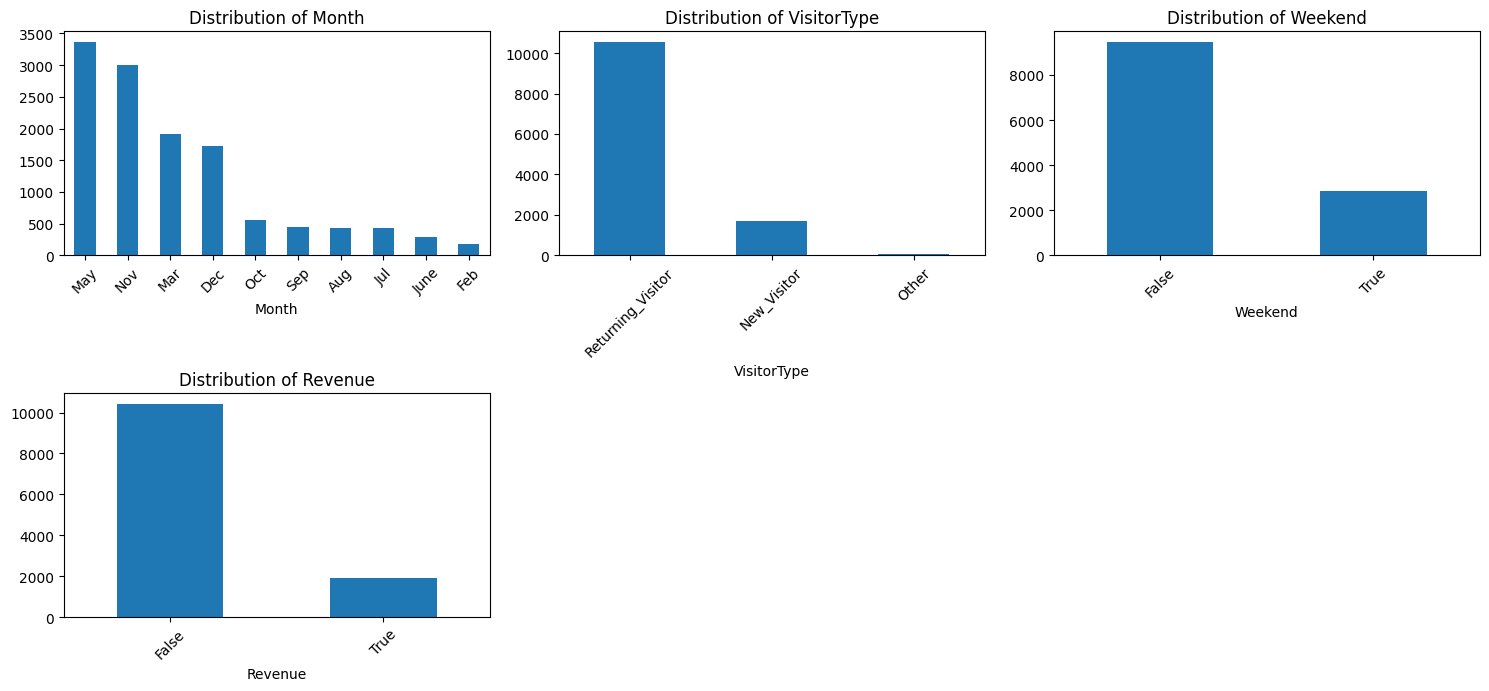

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

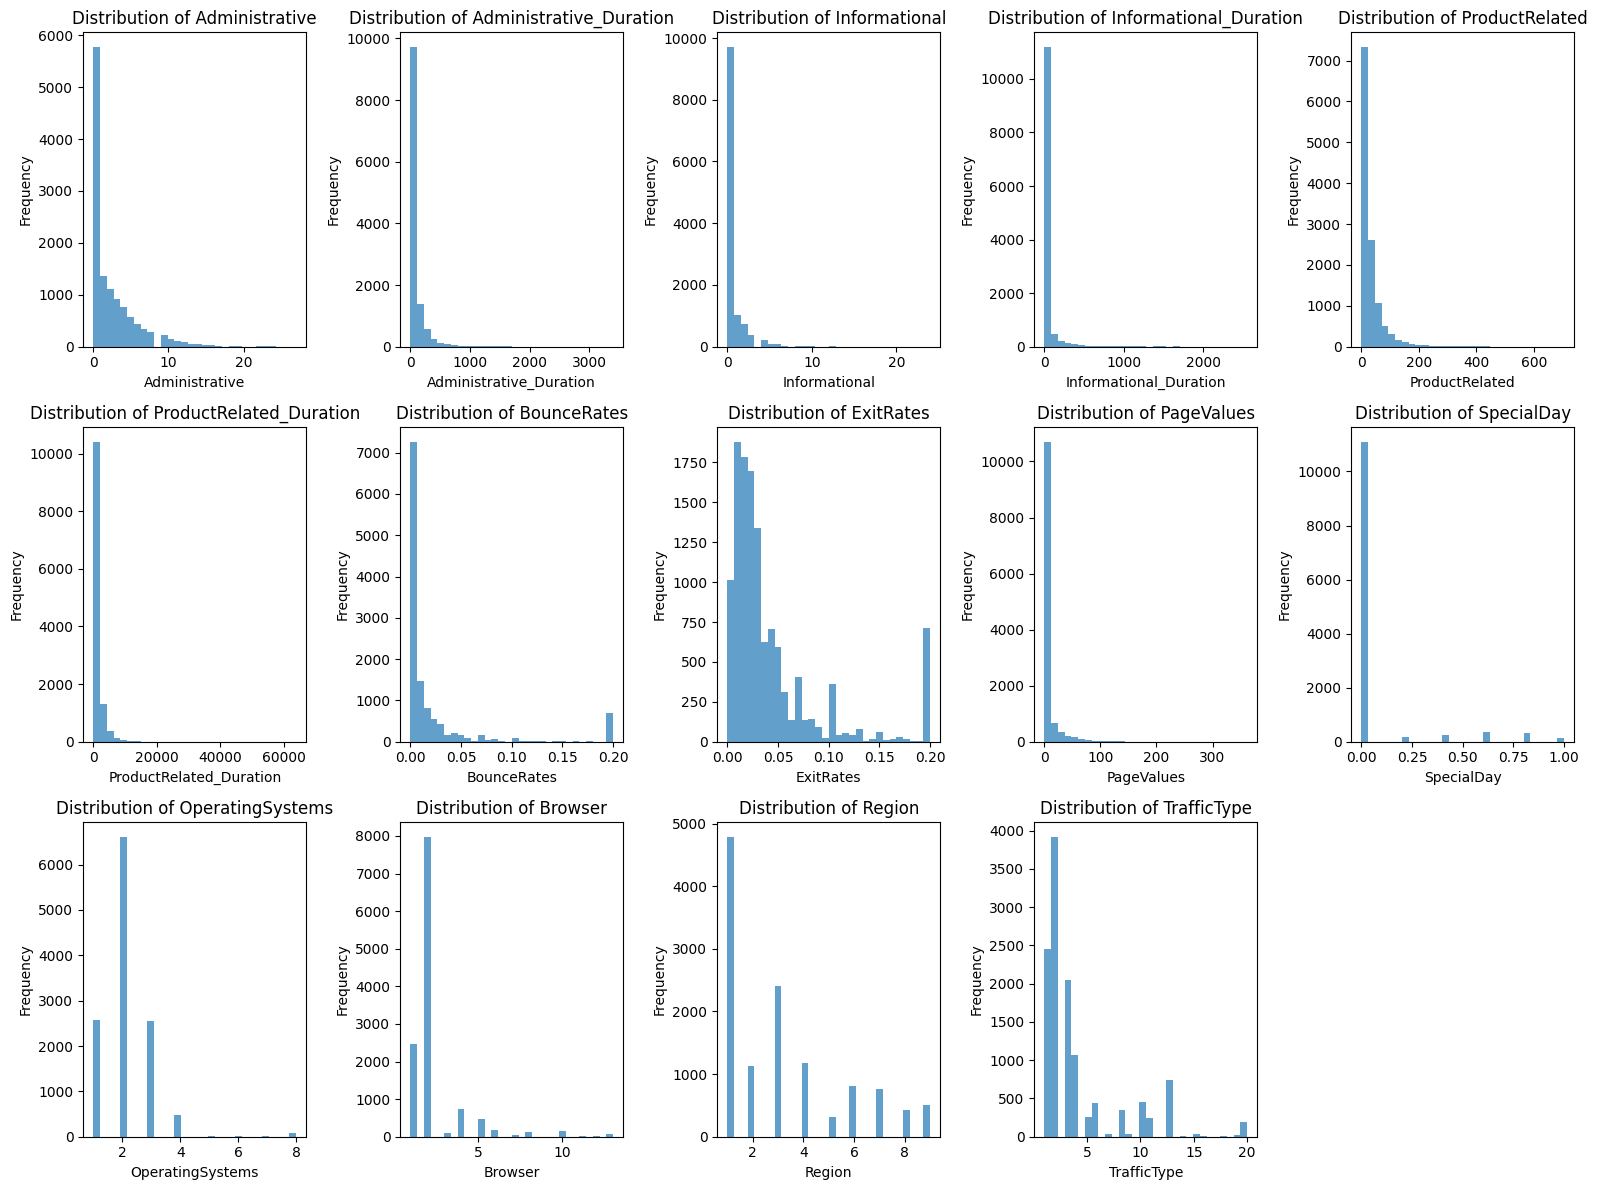

In [12]:
numerical_cols_except_revenue = [col for col in numerical_cols if col != 'Revenue']

fig, axes = plt.subplots(3, 5,figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_except_revenue):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

for i in range(len(numerical_cols_except_revenue), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

#### Hasil analisis statistik deskriptif untuk fitur-fitur kategorikal 

- Beberapa fitur memiliki nilai yang telah di encoding seperti OperatingSystems, Browser, Region, dan TrafficType, sehingga apabila diperlukan interpretasi nilai maka diperlukan data tambahan.
- Mayoritas pengunjung berasal dari region wilayah 2 dan ketika berselancar di website menggunakan OperatingSystem jenis 2 dengan Browser jenis 1.
- Returning Visitor merupakan pengunjung yang paling dominan. Pada fitur VisitorType ini perlu dilakukan penanganan terhadap nilai Other.
- Terdapat dua bulan yang hilang pada fitur Month yaitu January dan April. Bulan Mei memiliki jumlah pengunjung terbanyak, lalu diikuti dengan bulan November.

#### Hasil analisis statistik deskriptif untuk fitur-fitur numerikal
- Distribusi data secara keseluruhan cenderung positively-skewed (Mean > Median).
- Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRate, PageValues memiliki ekor distribusi yang pang panjang dengan nilai yang menumpuk disekitar angka 0.
- Dari kedua kondisi diatas dan dari analisa menggunakan boxplot mayoritas fitur memiliki outlier.

In [13]:
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 
                   'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

## Target Variable Analysis

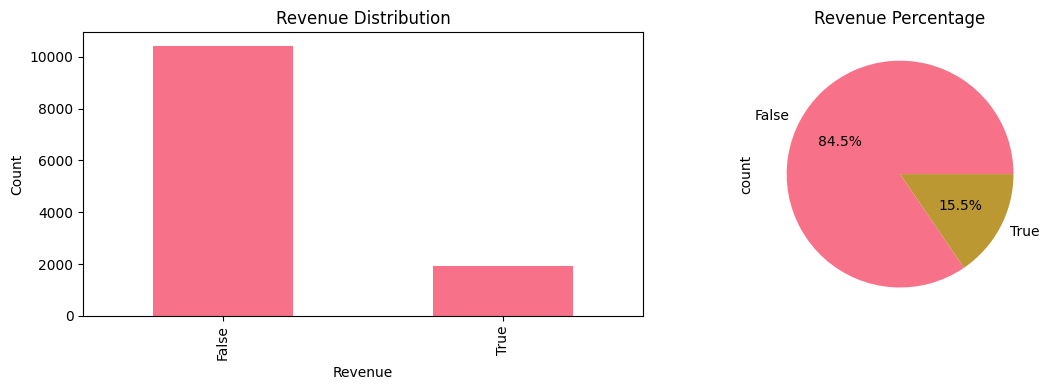

Revenue Distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Revenue Percentage:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [14]:
plt.style.use('default')
sns.set_palette("husl")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Revenue'].value_counts().plot(kind='bar')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Revenue'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Percentage')

plt.tight_layout()
plt.show()

print("Revenue Distribution:")
print(df['Revenue'].value_counts())
print("\nRevenue Percentage:")
print(df['Revenue'].value_counts(normalize=True) * 100)

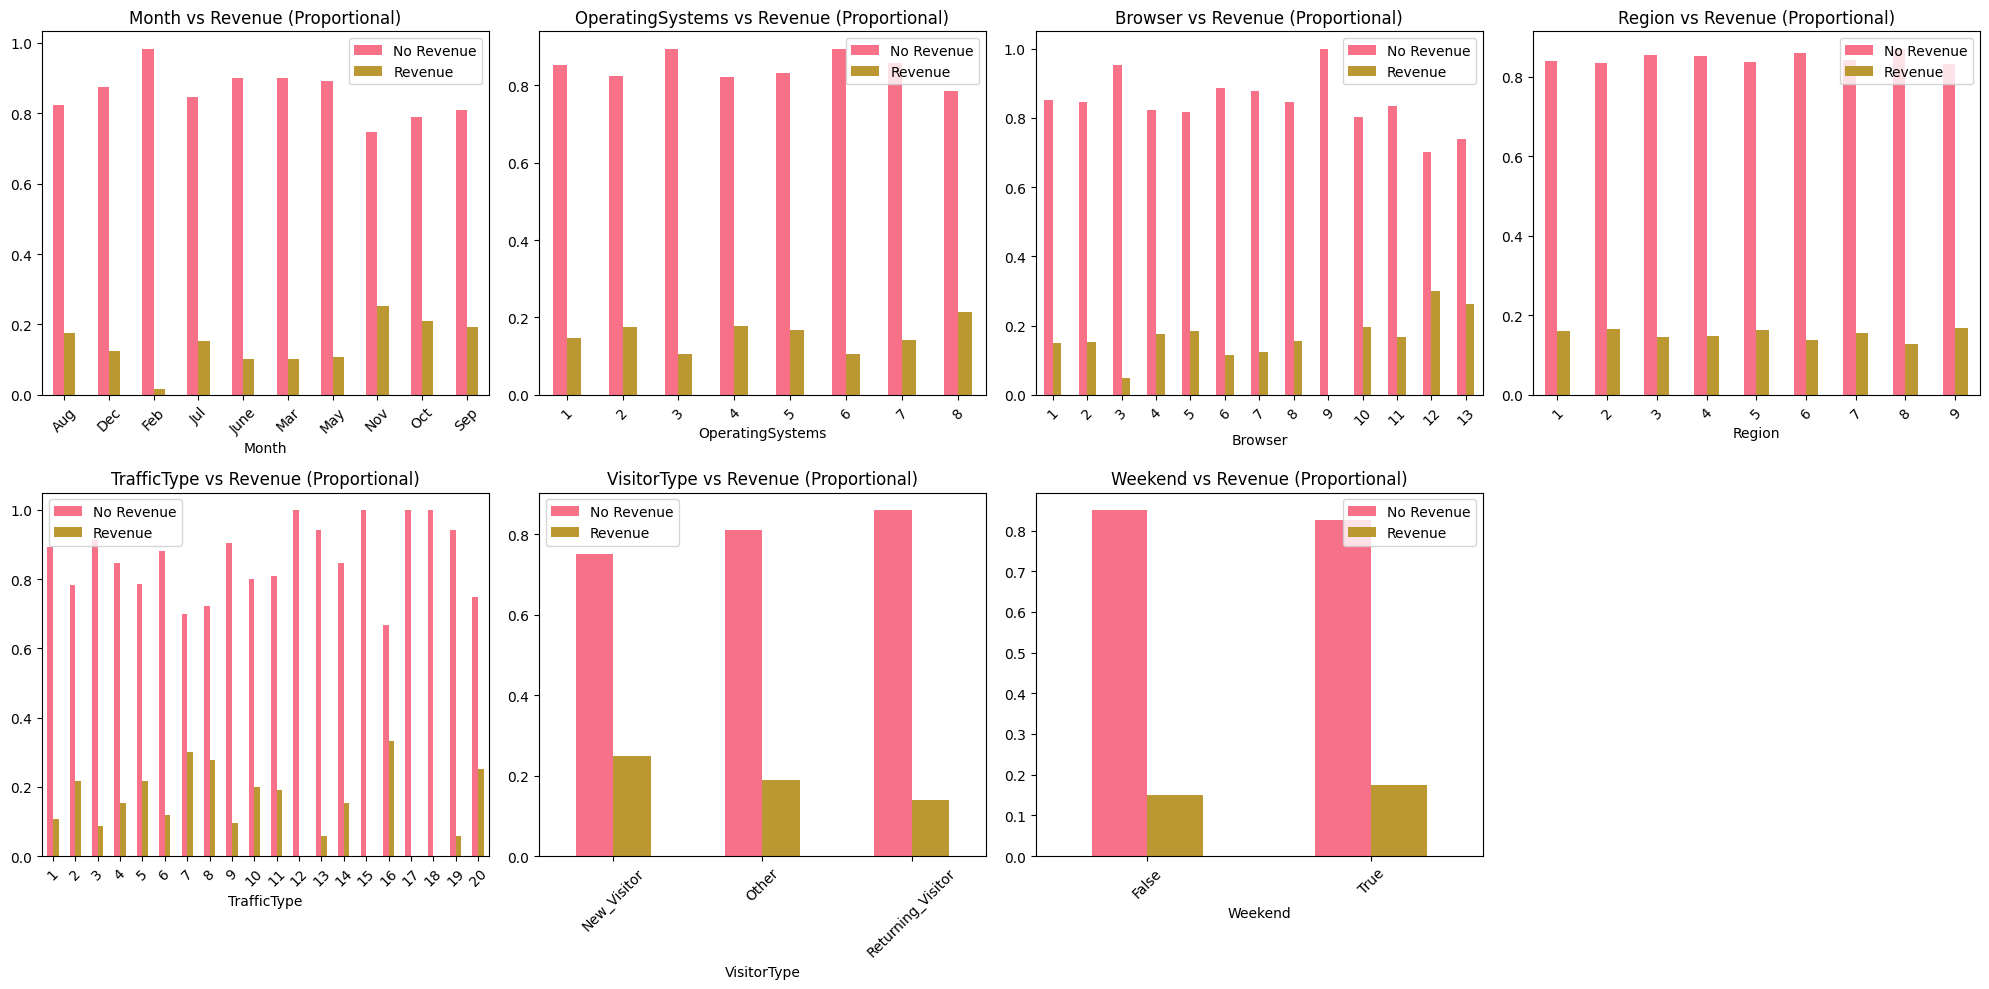

In [15]:
categorical_cols_no_revenue = [col for col in categorical_cols if col != 'Revenue']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols_no_revenue):
    if i < len(axes):
        pd.crosstab(df[col], df['Revenue'], normalize='index').plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} vs Revenue (Proportional)')
        axes[i].legend(['No Revenue', 'Revenue'])
        axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_cols_no_revenue), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

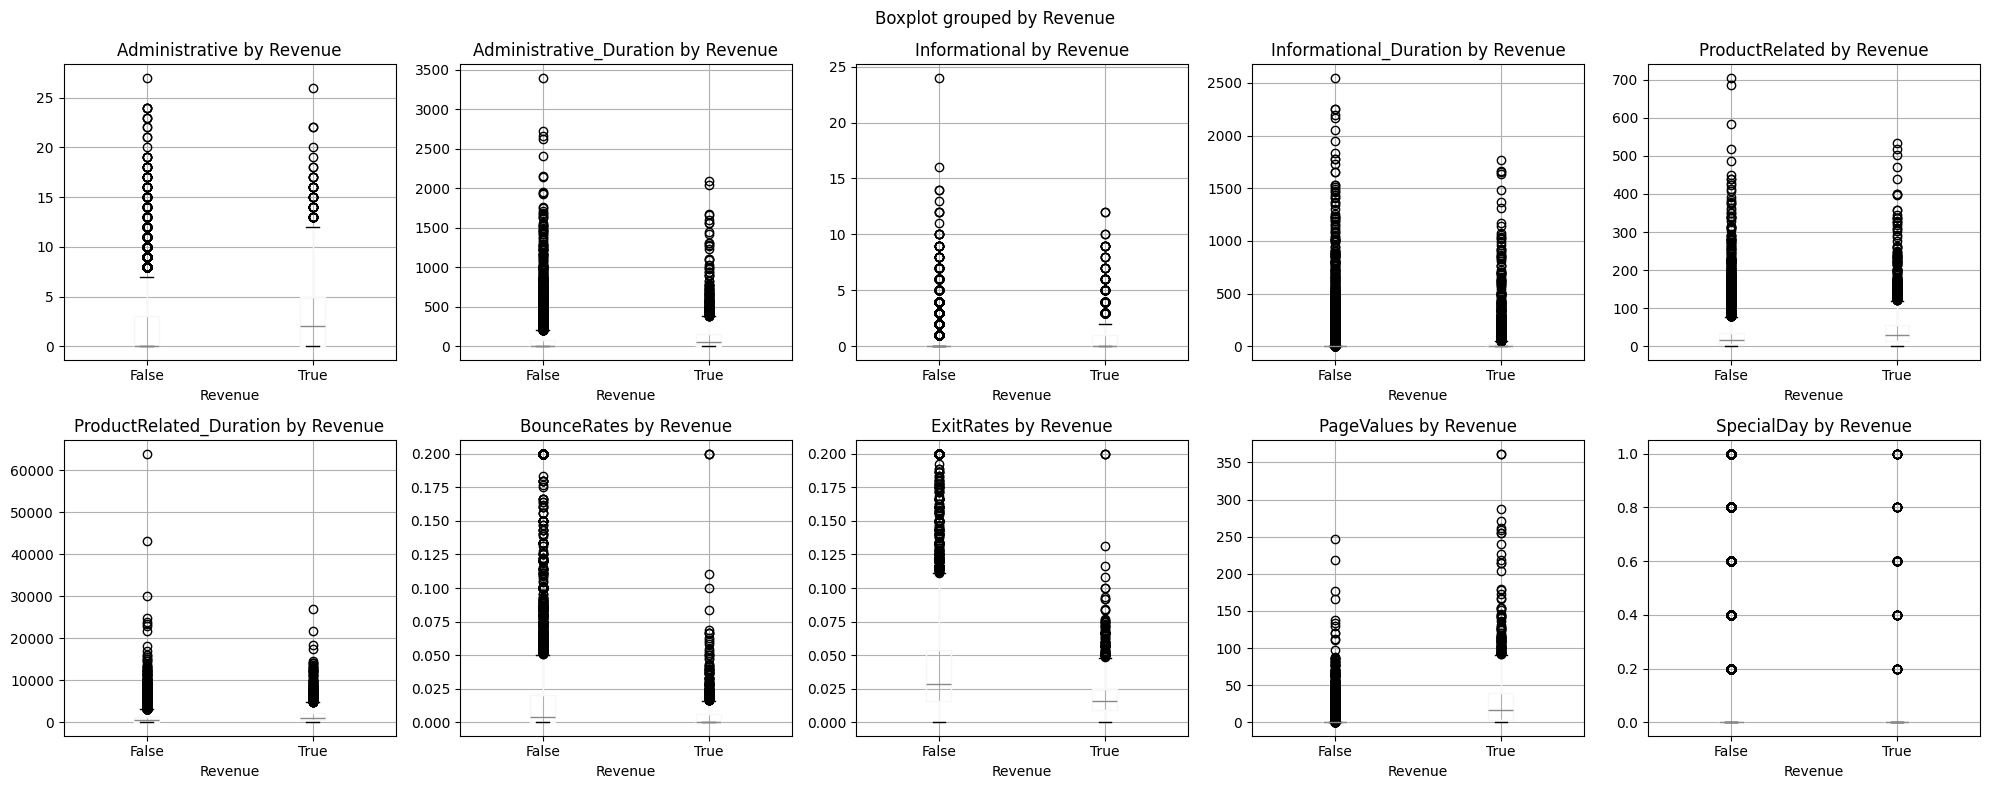

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df.boxplot(column=col, by='Revenue', ax=axes[i])
        axes[i].set_title(f'{col} by Revenue')
        axes[i].set_xlabel('Revenue')

plt.tight_layout()
plt.show()

## Correlation Analysis

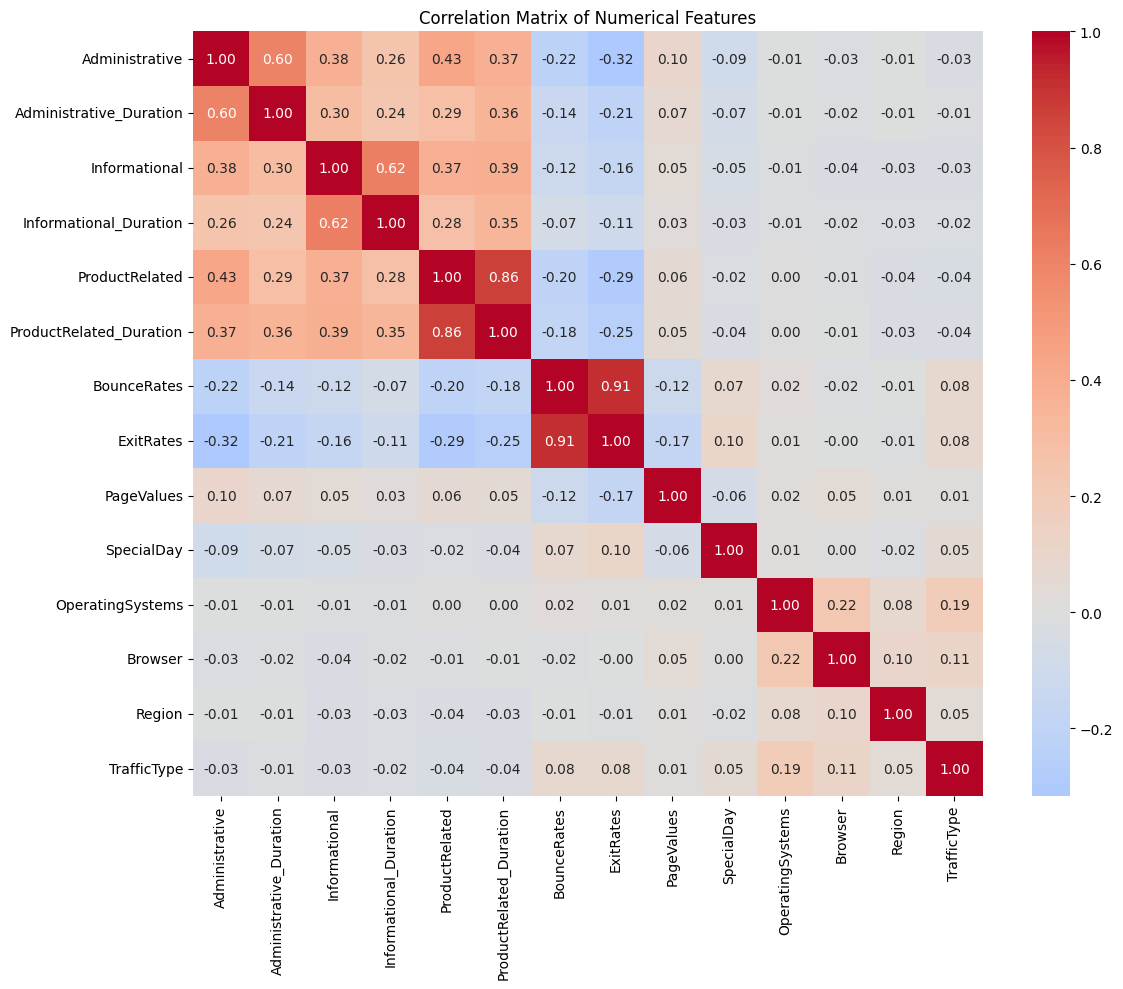

In [17]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

### Hasil analisis korelasi antar fitur
- Beberapa fitur yang memiliki multikorenialitas diantaranya adalah :
    1. ProductRelated dengan ProductRelated_Duration
    2. Adminisitrative dengan Adminisitrative_Duration
    3. Informational dengan Informational_Duration
    4. BounceRates dengan ExitRates


## Outlier Detection

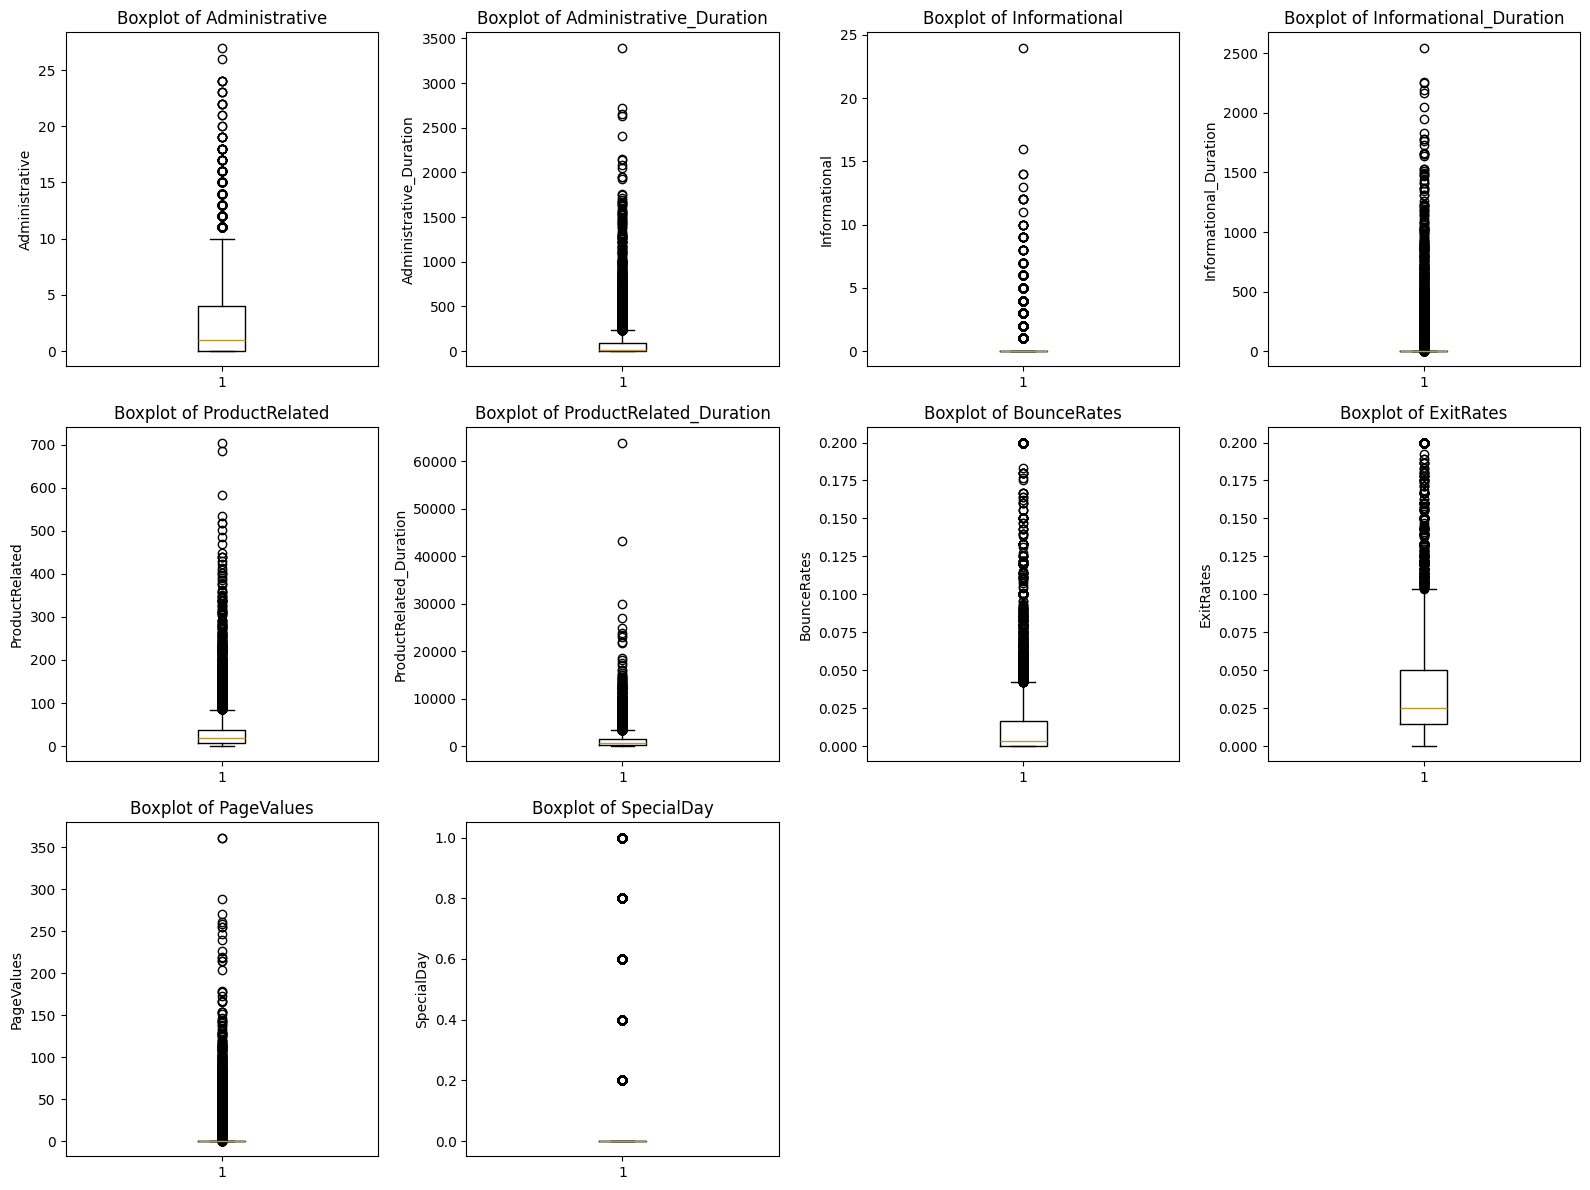

In [18]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].boxplot(df[col])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Session Behavior Analysis

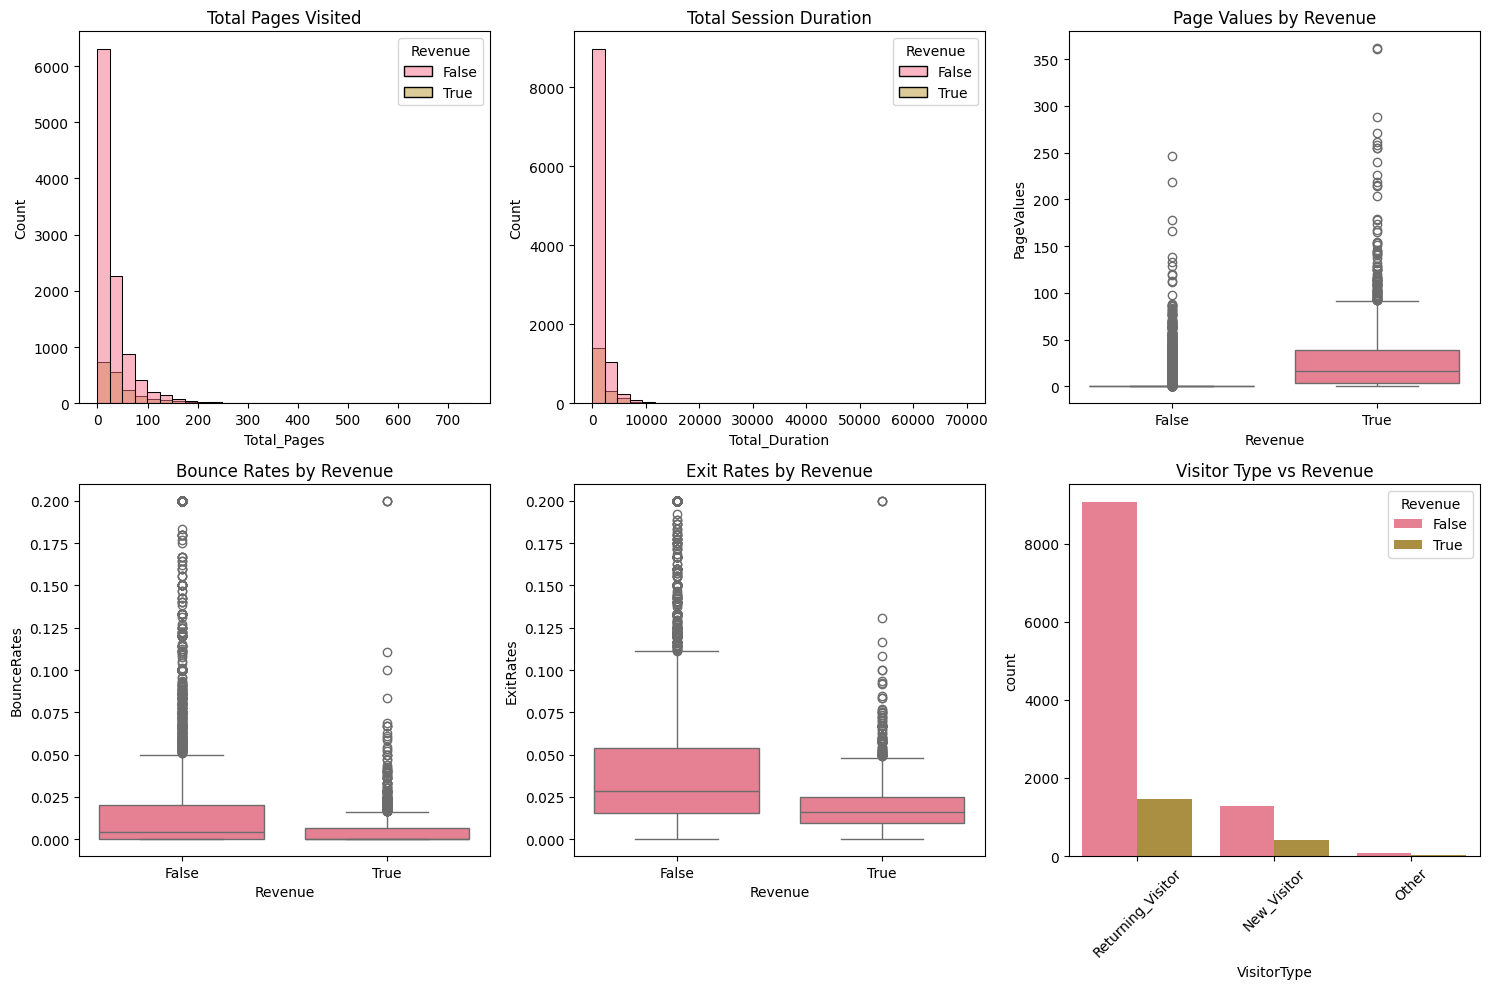

In [19]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['Total_Pages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
sns.histplot(data=df, x='Total_Pages', hue='Revenue', bins=30)
plt.title('Total Pages Visited')

plt.subplot(2, 3, 2)
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
sns.histplot(data=df, x='Total_Duration', hue='Revenue', bins=30)
plt.title('Total Session Duration')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Revenue', y='PageValues')
plt.title('Page Values by Revenue')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Revenue', y='BounceRates')
plt.title('Bounce Rates by Revenue')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Revenue', y='ExitRates')
plt.title('Exit Rates by Revenue')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='VisitorType', hue='Revenue')
plt.title('Visitor Type vs Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Statistical Tests

In [20]:
from scipy import stats

# T-test numerical features
print("T-test results for numerical features:")
print("="*50)

for col in numerical_cols:
    revenue_yes = df[df['Revenue'] == True][col]
    revenue_no = df[df['Revenue'] == False][col]
    
    t_stat, p_value = stats.ttest_ind(revenue_yes, revenue_no)
    print(f"{col}:")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")
    print()

T-test results for numerical features:
Administrative:
  T-statistic: 15.5752
  P-value: 0.0000
  Significant: Yes

Administrative_Duration:
  T-statistic: 10.4369
  P-value: 0.0000
  Significant: Yes

Informational:
  T-statistic: 10.6185
  P-value: 0.0000
  Significant: Yes

Informational_Duration:
  T-statistic: 7.8299
  P-value: 0.0000
  Significant: Yes

ProductRelated:
  T-statistic: 17.8282
  P-value: 0.0000
  Significant: Yes

ProductRelated_Duration:
  T-statistic: 17.1180
  P-value: 0.0000
  Significant: Yes

BounceRates:
  T-statistic: -16.9226
  P-value: 0.0000
  Significant: Yes

ExitRates:
  T-statistic: -23.5008
  P-value: 0.0000
  Significant: Yes

PageValues:
  T-statistic: 62.8432
  P-value: 0.0000
  Significant: Yes

SpecialDay:
  T-statistic: -9.1695
  P-value: 0.0000
  Significant: Yes



# Data Preprocessing

## Handle Duplicate Data

In [21]:
df = df.drop_duplicates()
df.shape

(12205, 20)

## Encoding Categorical Variables

In [22]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_1856\1406314117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekend'] = df['Weekend'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_1856\1406314117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Revenue'].astype(int)


In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])

C:\Users\User\AppData\Local\Temp\ipykernel_1856\4079327625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VisitorType'] = le.fit_transform(df['VisitorType'])


In [24]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['Month_num'] = df['Month'].map(month_map)

df['Month_sin'] = np.sin(2 * np.pi * df['Month_num'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month_num'] / 12)

df.drop(['Month', 'Month_num'], axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1856\1820148167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_num'] = df['Month'].map(month_map)
C:\Users\User\AppData\Local\Temp\ipykernel_1856\1820148167.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month_sin'] = np.sin(2 * np.pi * df['Month_num'] / 12)
C:\Users\User\AppData\Local\Temp\ipykernel_1856\1820148167.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

## Handling Outliers

In [25]:
updated_numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                         'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                         'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                         'Month_sin', 'Month_cos'] 

for col in updated_numerical_cols:
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)
    
    outliers_before = len(df[(df[col] < p1) | (df[col] > p99)])
    df[col] = df[col].clip(lower=p1, upper=p99)
    
    if outliers_before > 0:
        print(f"{col}: {outliers_before} outliers handled")

Administrative: 113 outliers handled
Administrative_Duration: 123 outliers handled
Informational: 83 outliers handled
Informational_Duration: 123 outliers handled
ProductRelated: 160 outliers handled
ProductRelated_Duration: 123 outliers handled
ExitRates: 122 outliers handled
PageValues: 123 outliers handled


C:\Users\User\AppData\Local\Temp\ipykernel_1856\1842926694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=p1, upper=p99)
C:\Users\User\AppData\Local\Temp\ipykernel_1856\1842926694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower=p1, upper=p99)
C:\Users\User\AppData\Local\Temp\ipykernel_1856\1842926694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [26]:
X = df.drop('Revenue', axis=1) 
y = df['Revenue']              

## Scaling Features

In [27]:
scaler = StandardScaler()
X[updated_numerical_cols] = scaler.fit_transform(X[updated_numerical_cols])

## Feature Selection

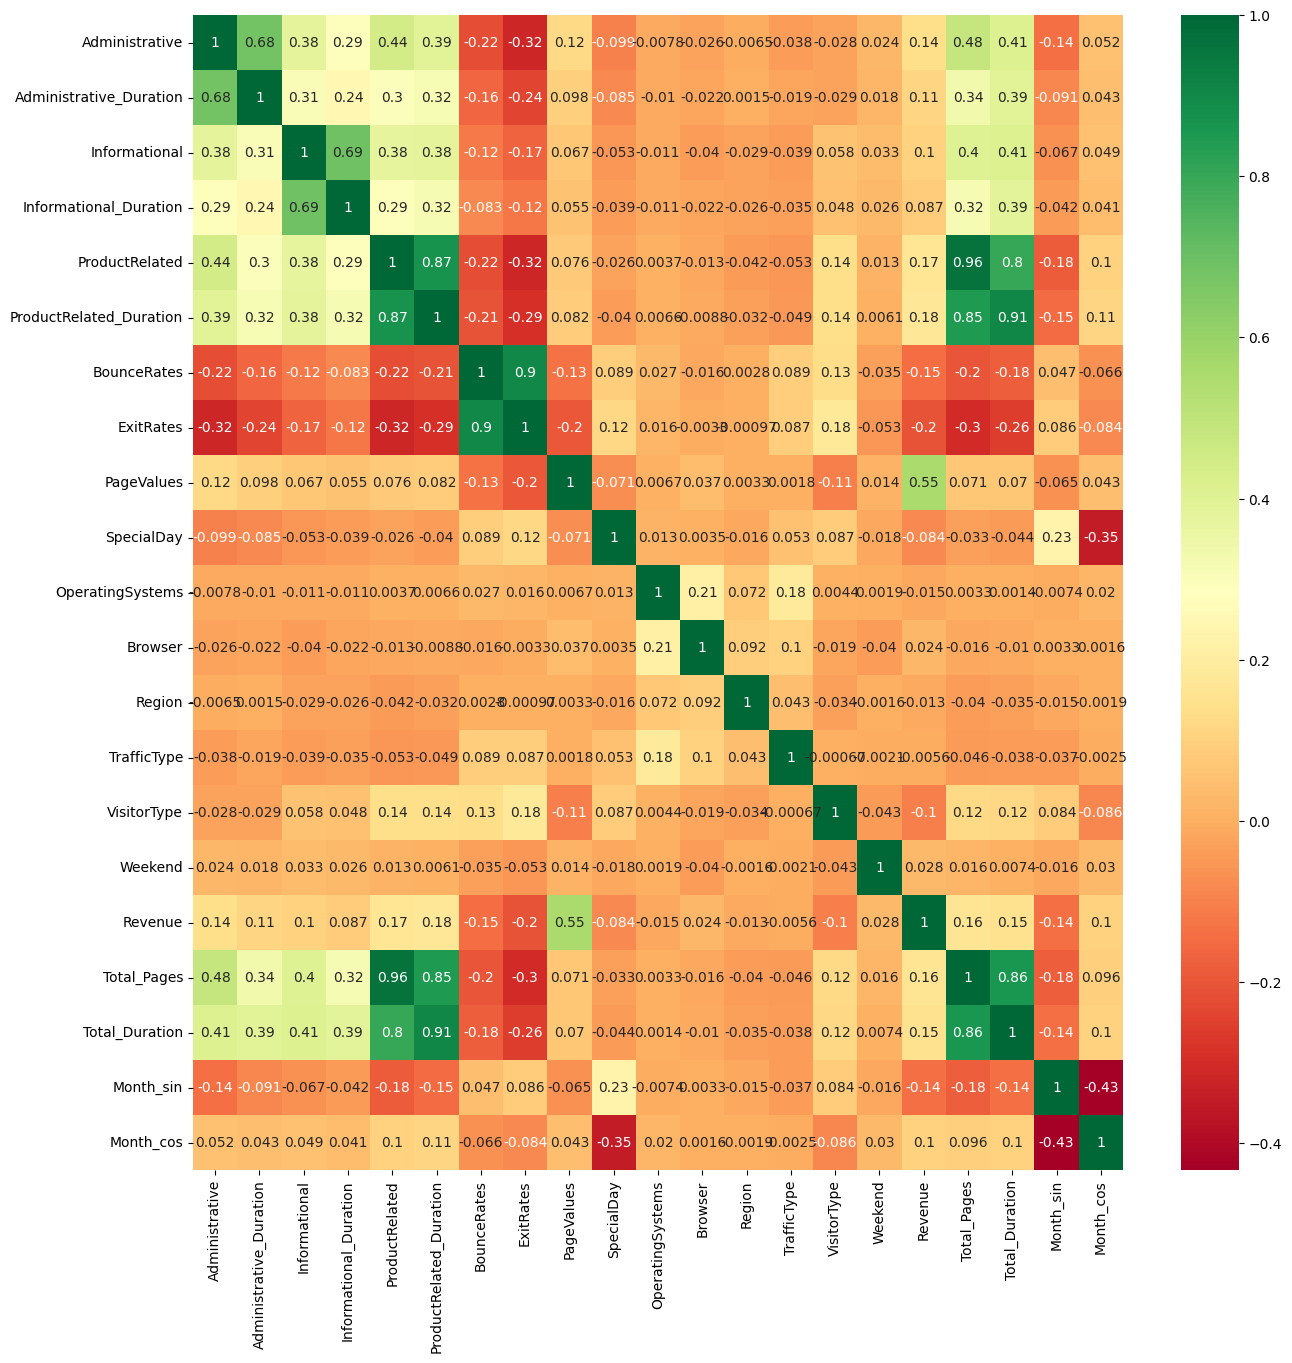

In [28]:
corrmat = df.loc[:, df.columns != 'revenue'].corr()
top_corr_features = corrmat.index 

plt.figure(figsize=(15,15)) 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Fitur yang redundant diantaranya
- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>
- BounceRates - ExitRates <br>

Tiga teratas akan dibuat feature extraction untuk mendapatkan durasi tiap page-nya, sedangkan BounceRates - ExitRates, akan dipilih salah satu, yaitu ExitRates.


## Feature Extraction

In [30]:
df['Duration per Page Administrative'] = df['Administrative_Duration'] / df['Administrative']
df['Duration per Page Informational'] = df['Informational_Duration'] / df['Informational']
df['Duration per Page ProductRelated'] = df['ProductRelated_Duration'] / df['ProductRelated'] 

C:\Users\User\AppData\Local\Temp\ipykernel_1856\2159501585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration per Page Administrative'] = df['Administrative_Duration'] / df['Administrative']
C:\Users\User\AppData\Local\Temp\ipykernel_1856\2159501585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration per Page Informational'] = df['Informational_Duration'] / df['Informational']
C:\Users\User\AppData\Local\Temp\ipykernel_1856\2159501585.py:3: SettingWithCopyWarning: 
A value is tryi

## Save Preprocessed Data

In [34]:
df.to_csv('../dataset/clean_data.csv')

# Split Data

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=40, stratify=y
)

In [38]:
print(f"Final feature shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

Final feature shape: (12205, 20)
Features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Total_Pages', 'Total_Duration', 'Month_sin', 'Month_cos']


# SMOTE

In [39]:
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    print("Installing imbalanced-learn...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])
    from imblearn.over_sampling import SMOTE

class_counts = y_train.value_counts()
print(f"Original Training Set Distribution:")
print(f"  Class 0 (No Purchase): {class_counts[0]:,} ({class_counts[0]/len(y_train)*100:.1f}%)")
print(f"  Class 1 (Purchase): {class_counts[1]:,} ({class_counts[1]/len(y_train)*100:.1f}%)")

imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("⚠️  Significant class imbalance detected! Applying SMOTE...")
    apply_smote = True
else:
    print("✅ Mild imbalance, SMOTE optional.")
    apply_smote = False

Original Training Set Distribution:
  Class 0 (No Purchase): 6,178 (84.4%)
  Class 1 (Purchase): 1,145 (15.6%)

Imbalance Ratio: 5.40:1
⚠️  Significant class imbalance detected! Applying SMOTE...


In [40]:
if apply_smote:
    print("\n🔄 Applying SMOTE to training data only...")
    
    # Initialize SMOTE
    smote = SMOTE(
        sampling_strategy='auto', 
        random_state=40,
        k_neighbors=5
    )
    
    # Apply SMOTE only to training data
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Convert back to DataFrame and Series for consistency
    X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
    y_train_smote = pd.Series(y_train_smote, name=y_train.name)
    
    print(f"\n✅ SMOTE Applied Successfully!")
    print(f"After SMOTE - Training set:")
    smote_counts = y_train_smote.value_counts()
    print(f"  Class 0: {smote_counts[0]:,} ({smote_counts[0]/len(y_train_smote)*100:.1f}%)")
    print(f"  Class 1: {smote_counts[1]:,} ({smote_counts[1]/len(y_train_smote)*100:.1f}%)")
    print(f"  Total samples: {len(y_train):,} → {len(y_train_smote):,}")
    
    # Test data remains unchanged
    print(f"\n📊 Test set (unchanged):")
    test_counts = y_test.value_counts()
    print(f"  Class 0: {test_counts[0]:,} ({test_counts[0]/len(y_test)*100:.1f}%)")
    print(f"  Class 1: {test_counts[1]:,} ({test_counts[1]/len(y_test)*100:.1f}%)")
    print(f"  Total samples: {len(y_test):,}")
    
else:
    # No SMOTE applied
    X_train_smote, y_train_smote = X_train.copy(), y_train.copy()
    print("\nUsing original training data (no SMOTE applied)")

print(f"\n🎯 FINAL DATA SUMMARY:")
print(f"  Training (SMOTE): {X_train_smote.shape[0]} samples")
print(f"  Test (Original):  {X_test.shape[0]} samples")
print(f"  Features:         {X_train_smote.shape[1]}")


🔄 Applying SMOTE to training data only...

✅ SMOTE Applied Successfully!
After SMOTE - Training set:
  Class 0: 6,178 (50.0%)
  Class 1: 6,178 (50.0%)
  Total samples: 7,323 → 12,356

📊 Test set (unchanged):
  Class 0: 4,119 (84.4%)
  Class 1: 763 (15.6%)
  Total samples: 4,882

🎯 FINAL DATA SUMMARY:
  Training (SMOTE): 12356 samples
  Test (Original):  4882 samples
  Features:         20


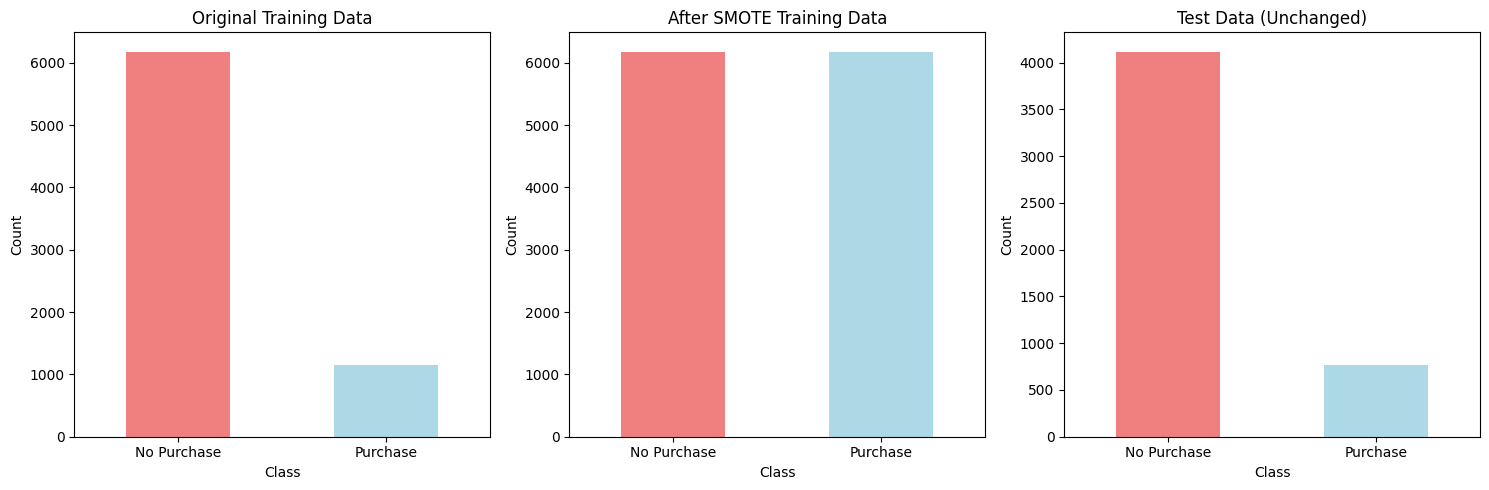

In [41]:
if apply_smote:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    y_train.value_counts().plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'])
    axes[0].set_title('Original Training Data')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(['No Purchase', 'Purchase'], rotation=0)
    
    y_train_smote.value_counts().plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightblue'])
    axes[1].set_title('After SMOTE Training Data')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')
    axes[1].set_xticklabels(['No Purchase', 'Purchase'], rotation=0)
    
    y_test.value_counts().plot(kind='bar', ax=axes[2], color=['lightcoral', 'lightblue'])
    axes[2].set_title('Test Data (Unchanged)')
    axes[2].set_xlabel('Class')
    axes[2].set_ylabel('Count')
    axes[2].set_xticklabels(['No Purchase', 'Purchase'], rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    original_minority = class_counts[1]
    smote_minority = smote_counts[1]
    synthetic_samples = smote_minority - original_minority

In [42]:
print("\n🔍 DATA INTEGRITY CHECK:")
print("-" * 30)

print(f"Training data shape: {X_train_smote.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Feature columns match: {list(X_train_smote.columns) == list(X_test.columns)}")

print(f"\nTraining data types consistent: {X_train_smote.dtypes.equals(X_train.dtypes)}")
print(f"No missing values in training: {X_train_smote.isnull().sum().sum() == 0}")
print(f"No missing values in test: {X_test.isnull().sum().sum() == 0}")

print(f"\nTarget variable types:")
print(f"  Training target type: {type(y_train_smote.iloc[0])}")
print(f"  Test target type: {type(y_test.iloc[0])}")
print(f"  Unique values in training: {sorted(y_train_smote.unique())}")
print(f"  Unique values in test: {sorted(y_test.unique())}")

print("\n✅ Data integrity verified - ready for model training!")


🔍 DATA INTEGRITY CHECK:
------------------------------
Training data shape: (12356, 20)
Test data shape: (4882, 20)
Feature columns match: True

Training data types consistent: True
No missing values in training: True
No missing values in test: True

Target variable types:
  Training target type: <class 'numpy.int32'>
  Test target type: <class 'numpy.int32'>
  Unique values in training: [0, 1]
  Unique values in test: [0, 1]

✅ Data integrity verified - ready for model training!


# Model Machine Learning

In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': LogisticRegression(random_state=40, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=40, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=40, n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=40, max_depth=10),
    'Naive Bayes': GaussianNB()
}

results = {}
for name, model in models.items():
    try:
        print(f"Training {name}...")
        
        # Cross-validation dengan SMOTE data
        cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=3, scoring='accuracy')
        
        # Fit and predict dengan SMOTE data
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Calculate all metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
        
        results[name] = {
            'CV_Mean': cv_scores.mean(),
            'CV_Std': cv_scores.std(),
            'Test_Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC': auc
        }
        
        print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        if auc:
            print(f"AUC: {auc:.4f}")
        print()
        
    except Exception as e:
        print(f"  ❌ Error training {name}: {e}")
        print(f"  Skipping {name}...")
        continue

print(f"Successfully trained {len(results)} models")

# Store trained models untuk hyperparameter tuning nanti
trained_models = {}
for name in results.keys():
    if name in models:
        trained_models[name] = models[name]

print(f"Stored {len(trained_models)} trained models for hyperparameter tuning")

Training Logistic Regression...
CV Score: 0.8538 (+/- 0.0443)
Test Accuracy: 0.8662
Precision: 0.5571
Recall: 0.7038
F1-Score: 0.6219
AUC: 0.8882

Training Random Forest...
CV Score: 0.9307 (+/- 0.0727)
Test Accuracy: 0.8941
Precision: 0.6569
Recall: 0.6750
F1-Score: 0.6658
AUC: 0.9195

Training Gradient Boosting...
CV Score: 0.9183 (+/- 0.0940)
Test Accuracy: 0.8941
Precision: 0.6450
Recall: 0.7169
F1-Score: 0.6791
AUC: 0.9222

Training KNN...
CV Score: 0.7931 (+/- 0.0136)
Test Accuracy: 0.6702
Precision: 0.2335
Recall: 0.4862
F1-Score: 0.3155
AUC: 0.6403

Training Decision Tree...
CV Score: 0.9121 (+/- 0.0814)
Test Accuracy: 0.8775
Precision: 0.5930
Recall: 0.6894
F1-Score: 0.6376
AUC: 0.8303

Training Naive Bayes...
CV Score: 0.7659 (+/- 0.0395)
Test Accuracy: 0.6809
Precision: 0.3054
Recall: 0.8178
F1-Score: 0.4448
AUC: 0.8161

Successfully trained 6 models
Stored 6 trained models for hyperparameter tuning


MODEL COMPARISON RESULTS (with SMOTE):
                     CV_Mean  CV_Std  Test_Accuracy  Precision  Recall  \
Logistic Regression   0.8538  0.0222         0.8662     0.5571  0.7038   
Random Forest         0.9307  0.0364         0.8941     0.6569  0.6750   
Gradient Boosting     0.9183  0.0470         0.8941     0.6450  0.7169   
KNN                   0.7931  0.0068         0.6702     0.2335  0.4862   
Decision Tree         0.9121  0.0407         0.8775     0.5930  0.6894   
Naive Bayes           0.7659  0.0198         0.6809     0.3054  0.8178   

                     F1-Score     AUC  
Logistic Regression    0.6219  0.8882  
Random Forest          0.6658  0.9195  
Gradient Boosting      0.6791  0.9222  
KNN                    0.3155  0.6403  
Decision Tree          0.6376  0.8303  
Naive Bayes            0.4448  0.8161  


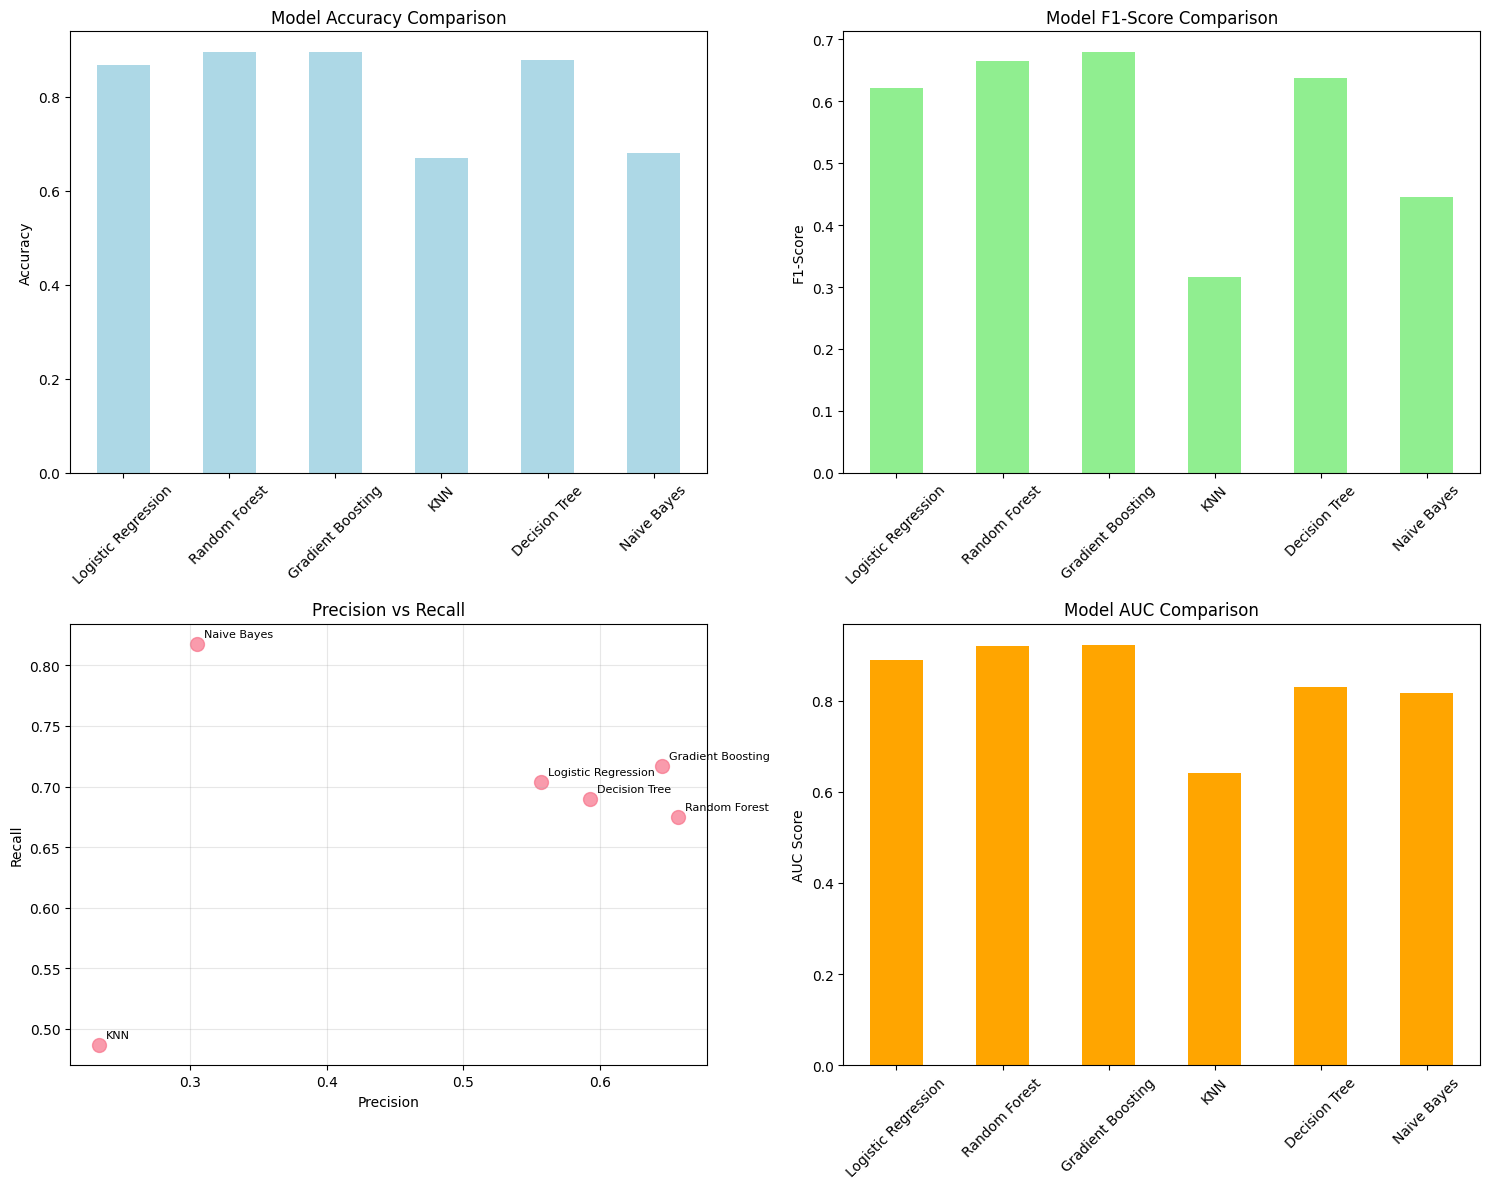


🏆 Best model by F1-Score: Gradient Boosting (F1: 0.6791)


In [45]:
results_df = pd.DataFrame(results).T
print("MODEL COMPARISON RESULTS (with SMOTE):")
print("="*60)
print(results_df.round(4))

# Enhanced plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
results_df['Test_Accuracy'].plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# F1-Score comparison
results_df['F1-Score'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Model F1-Score Comparison')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1,0].scatter(results_df['Precision'], results_df['Recall'], s=100, alpha=0.7)
for i, model in enumerate(results_df.index):
    axes[1,0].annotate(model, (results_df.iloc[i]['Precision'], results_df.iloc[i]['Recall']), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1,0].set_xlabel('Precision')
axes[1,0].set_ylabel('Recall')
axes[1,0].set_title('Precision vs Recall')
axes[1,0].grid(True, alpha=0.3)

# AUC comparison
auc_data = results_df['AUC'].dropna()
auc_data.plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Model AUC Comparison')
axes[1,1].set_ylabel('AUC Score')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Best model selection based on F1-Score
best_model_f1 = results_df['F1-Score'].idxmax()
print(f"\n🏆 Best model by F1-Score: {best_model_f1} (F1: {results_df.loc[best_model_f1, 'F1-Score']:.4f})")

In [46]:
best_model = models[best_model_f1]
y_pred_best = best_model.predict(X_test)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4119
           1       0.65      0.72      0.68       763

    accuracy                           0.89      4882
   macro avg       0.80      0.82      0.81      4882
weighted avg       0.90      0.89      0.90      4882



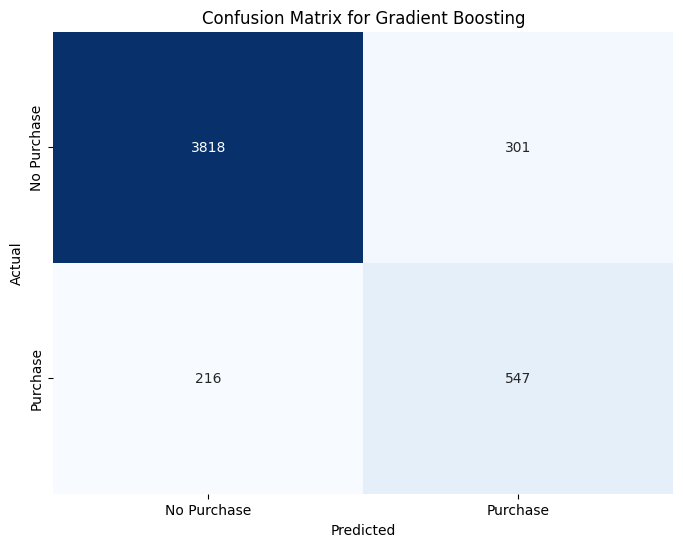

In [47]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title(f'Confusion Matrix for {best_model_f1}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
all_predictions = {}

for name, model in trained_models.items():
    try:
        y_pred = model.predict(X_test)
        all_predictions[name] = y_pred
        
        print(f"\n {name.upper()}")
        print("-" * (len(name) + 5))
        print(classification_report(y_test, y_pred, 
                                  target_names=['No Purchase', 'Purchase'],
                                  digits=4))
        
        # Tambahan metrics summary
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f"Overall Accuracy: {accuracy:.4f}")
        print(f"F1-Score: {f1:.4f}")
        
    except Exception as e:
        print(f"❌ Error generating report for {name}: {e}")

print("\n" + "="*70)
print(" PERFORMANCE RANKING SUMMARY")
print("="*70)

# Ranking berdasarkan F1-Score
model_f1_scores = []
for name in trained_models.keys():
    if name in all_predictions:
        f1 = f1_score(y_test, all_predictions[name])
        model_f1_scores.append((name, f1))

# Sort berdasarkan F1-Score
model_f1_scores.sort(key=lambda x: x[1], reverse=True)

print("\nRANKING BERDASARKAN F1-SCORE:")
for i, (name, f1) in enumerate(model_f1_scores):
    rank_emoji = "🥇" if i == 0 else "🥈" if i == 1 else "🥉" if i == 2 else "🏅"
    print(f"{rank_emoji} {i+1}. {name:<20} F1-Score: {f1:.4f}")


 LOGISTIC REGRESSION
------------------------
              precision    recall  f1-score   support

 No Purchase     0.9423    0.8963    0.9188      4119
    Purchase     0.5571    0.7038    0.6219       763

    accuracy                         0.8662      4882
   macro avg     0.7497    0.8001    0.7703      4882
weighted avg     0.8821    0.8662    0.8724      4882

Overall Accuracy: 0.8662
F1-Score: 0.6219

 RANDOM FOREST
------------------
              precision    recall  f1-score   support

 No Purchase     0.9395    0.9347    0.9371      4119
    Purchase     0.6569    0.6750    0.6658       763

    accuracy                         0.8941      4882
   macro avg     0.7982    0.8048    0.8014      4882
weighted avg     0.8953    0.8941    0.8947      4882

Overall Accuracy: 0.8941
F1-Score: 0.6658

 GRADIENT BOOSTING
----------------------
              precision    recall  f1-score   support

 No Purchase     0.9465    0.9269    0.9366      4119
    Purchase     0.6450    0

In [ ]:
detailed_metrics = {}

for name in trained_models.keys():
    if name in all_predictions:
        y_pred = all_predictions[name]
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        npv = tn / (tn + fn) if (tn + fn) > 0 else 0  
        
        detailed_metrics[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Specificity': specificity,
            'NPV': npv,
            'True Pos': tp,
            'True Neg': tn,
            'False Pos': fp,
            'False Neg': fn
        }

detailed_df = pd.DataFrame(detailed_metrics).T

print("PERFORMANCE METRICS:")
print(detailed_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'NPV']].round(4))

print("\nCONFUSION MATRIX COMPONENTS:")
print(detailed_df[['True Pos', 'True Neg', 'False Pos', 'False Neg']].astype(int))

PERFORMANCE METRICS:
                     Accuracy  Precision  Recall  F1-Score  Specificity  \
Logistic Regression    0.8662     0.5571  0.7038    0.6219       0.8963   
Random Forest          0.8941     0.6569  0.6750    0.6658       0.9347   
Gradient Boosting      0.8941     0.6450  0.7169    0.6791       0.9269   
KNN                    0.6702     0.2335  0.4862    0.3155       0.7043   
Decision Tree          0.8775     0.5930  0.6894    0.6376       0.9124   
Naive Bayes            0.6809     0.3054  0.8178    0.4448       0.6555   

                        NPV  
Logistic Regression  0.9423  
Random Forest        0.9395  
Gradient Boosting    0.9465  
KNN                  0.8810  
Decision Tree        0.9407  
Naive Bayes          0.9510  

CONFUSION MATRIX COMPONENTS:
                     True Pos  True Neg  False Pos  False Neg
Logistic Regression       537      3692        427        226
Random Forest             515      3850        269        248
Gradient Boosting         5

# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import time

rf_param_grid_small = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

print("Parameter grid for Random Forest:")
for param, values in rf_param_grid_small.items():
    print(f"  {param}: {values}")

rf_base = RandomForestClassifier(random_state=40)

print("\n🔍 Starting GridSearchCV...")
start_time = time.time()

rf_grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid_small,
    cv=3,  
    scoring='f1',  
    n_jobs=1,      
    verbose=1
)

rf_grid_search.fit(X_train_smote, y_train_smote)

end_time = time.time()
print(f"\n⏱️ Grid Search completed in {end_time - start_time:.2f} seconds")

best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_
best_cv_score = rf_grid_search.best_score_

print(f"\n🏆 BEST HYPERPARAMETERS:")
print("="*40)
for param, value in best_rf_params.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best CV F1-Score: {best_cv_score:.4f}")

Parameter grid for Random Forest:
  n_estimators: [100, 200]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5]
  min_samples_leaf: [1, 2]
  max_features: ['sqrt', 'log2']

🔍 Starting GridSearchCV...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

⏱️ Grid Search completed in 501.55 seconds

🏆 BEST HYPERPARAMETERS:
  max_depth: 20
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 100

📊 Best CV F1-Score: 0.9306


In [51]:
y_pred_tuned = best_rf_model.predict(X_test)
y_pred_proba_tuned = best_rf_model.predict_proba(X_test)[:, 1]

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)
tuned_auc = roc_auc_score(y_test, y_pred_proba_tuned)

original_model = models[best_model_f1]
y_pred_original = original_model.predict(X_test)
y_pred_proba_original = original_model.predict_proba(X_test)[:, 1]

original_accuracy = accuracy_score(y_test, y_pred_original)
original_precision = precision_score(y_test, y_pred_original)
original_recall = recall_score(y_test, y_pred_original)
original_f1 = f1_score(y_test, y_pred_original)
original_auc = roc_auc_score(y_test, y_pred_proba_original)

comparison_data = {
    'Original RF': [original_accuracy, original_precision, original_recall, original_f1, original_auc],
    'Tuned RF': [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1, tuned_auc],
    'Improvement': [tuned_accuracy - original_accuracy, 
                   tuned_precision - original_precision,
                   tuned_recall - original_recall,
                   tuned_f1 - original_f1,
                   tuned_auc - original_auc]
}

comparison_df = pd.DataFrame(comparison_data, 
                           index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

print("PERFORMANCE COMPARISON:")
print(comparison_df.round(4))

# Highlight improvements
print(f"\n📈 IMPROVEMENTS:")
for metric in comparison_df.index:
    improvement = comparison_df.loc[metric, 'Improvement']
    if improvement > 0:
        print(f"  ✅ {metric}: +{improvement:.4f}")
    elif improvement < 0:
        print(f"  ⚠️ {metric}: {improvement:.4f}")
    else:
        print(f"  ➖ {metric}: No change")

PERFORMANCE COMPARISON:
           Original RF  Tuned RF  Improvement
Accuracy        0.8941    0.8914      -0.0027
Precision       0.6450    0.6429      -0.0021
Recall          0.7169    0.6868      -0.0301
F1-Score        0.6791    0.6641      -0.0149
AUC             0.9222    0.9181      -0.0041

📈 IMPROVEMENTS:
  ⚠️ Accuracy: -0.0027
  ⚠️ Precision: -0.0021
  ⚠️ Recall: -0.0301
  ⚠️ F1-Score: -0.0149
  ⚠️ AUC: -0.0041


# Feature Importance

TOP 15 MOST IMPORTANT FEATURES:
----------------------------------------
 1. PageValues                0.4617
 2. Administrative            0.0610
 3. Administrative_Duration   0.0543
 4. ExitRates                 0.0525
 5. Month_sin                 0.0514
 6. Month_cos                 0.0513
 7. Total_Duration            0.0367
 8. ProductRelated_Duration   0.0361
 9. BounceRates               0.0305
10. ProductRelated            0.0295
11. VisitorType               0.0258
12. Total_Pages               0.0249
13. Informational             0.0186
14. Region                    0.0128
15. OperatingSystems          0.0125


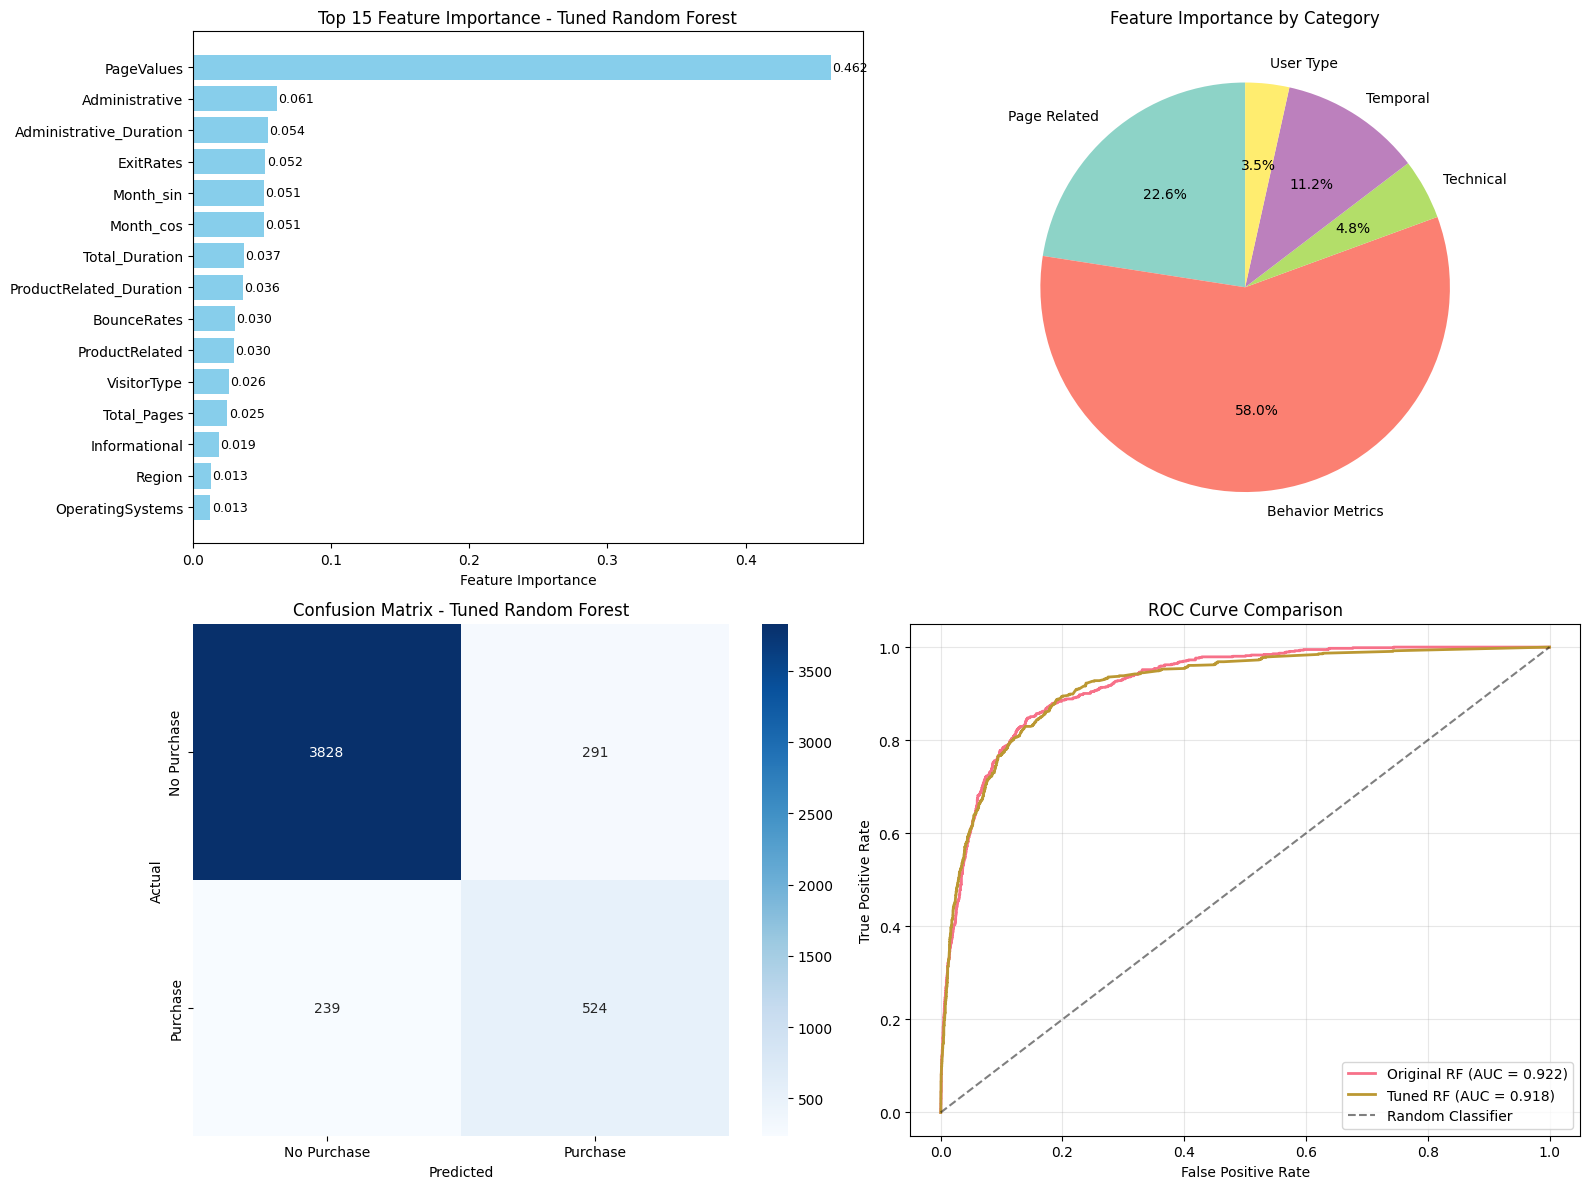

In [52]:
feature_importance = best_rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance,
    'Rank': range(1, len(feature_names) + 1)
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("TOP 15 MOST IMPORTANT FEATURES:")
print("-" * 40)
for i in range(min(15, len(importance_df))):
    feature = importance_df.iloc[i]['Feature']
    importance = importance_df.iloc[i]['Importance']
    rank = i + 1
    print(f"{rank:2d}. {feature:<25} {importance:.4f}")

# Visualize feature importance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 Feature Importance
top_15_features = importance_df.head(15)
bars = axes[0,0].barh(range(len(top_15_features)), top_15_features['Importance'], color='skyblue')
axes[0,0].set_yticks(range(len(top_15_features)))
axes[0,0].set_yticklabels(top_15_features['Feature'])
axes[0,0].set_xlabel('Feature Importance')
axes[0,0].set_title('Top 15 Feature Importance - Tuned Random Forest')
axes[0,0].invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0,0].text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                   f'{width:.3f}', ha='left', va='center', fontsize=9)

# Feature importance by category
feature_groups = {
    'Page Related': ['Administrative', 'Administrative_Duration', 'Informational', 
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
    'Behavior Metrics': ['BounceRates', 'ExitRates', 'PageValues'],
    'Technical': ['OperatingSystems', 'Browser', 'Region', 'TrafficType'],
    'Temporal': ['Month_sin', 'Month_cos', 'SpecialDay'],
    'User Type': ['VisitorType', 'Weekend']
}

category_importance = {}
for category, features in feature_groups.items():
    category_features = [f for f in features if f in feature_names]
    if category_features:
        category_total = importance_df[importance_df['Feature'].isin(category_features)]['Importance'].sum()
        category_importance[category] = category_total

# Plot category importance
categories = list(category_importance.keys())
importances = list(category_importance.values())
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

wedges, texts, autotexts = axes[0,1].pie(importances, labels=categories, autopct='%1.1f%%', 
                                         colors=colors, startangle=90)
axes[0,1].set_title('Feature Importance by Category')

# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
            xticklabels=['No Purchase', 'Purchase'], 
            yticklabels=['No Purchase', 'Purchase'])
axes[1,0].set_title('Confusion Matrix - Tuned Random Forest')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

# ROC Curve Comparison
fpr_original, tpr_original, _ = roc_curve(y_test, y_pred_proba_original)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

axes[1,1].plot(fpr_original, tpr_original, label=f'Original RF (AUC = {original_auc:.3f})', linewidth=2)
axes[1,1].plot(fpr_tuned, tpr_tuned, label=f'Tuned RF (AUC = {tuned_auc:.3f})', linewidth=2)
axes[1,1].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('ROC Curve Comparison')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

print("🔍 OVERFITTING DETECTION ANALYSIS")
print("="*50)

# 1. Training vs Test Accuracy Comparison
print("\n1. TRAINING vs TEST PERFORMANCE:")
print("-" * 35)

# Get training accuracy
train_pred_tuned = best_rf_model.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, train_pred_tuned)
train_f1 = f1_score(y_train_smote, train_pred_tuned)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {tuned_accuracy:.4f}")
print(f"Accuracy Gap:      {train_accuracy - tuned_accuracy:.4f}")
print()
print(f"Training F1-Score: {train_f1:.4f}")
print(f"Test F1-Score:     {tuned_f1:.4f}")
print(f"F1 Gap:            {train_f1 - tuned_f1:.4f}")

# Overfitting threshold (generally gap > 0.05-0.1 indicates overfitting)
accuracy_gap = train_accuracy - tuned_accuracy
f1_gap = train_f1 - tuned_f1

print(f"\n📊 OVERFITTING ASSESSMENT:")
if accuracy_gap > 0.1:
    print(f"  ⚠️ HIGH OVERFITTING: Accuracy gap = {accuracy_gap:.4f}")
elif accuracy_gap > 0.05:
    print(f"  🔶 MODERATE OVERFITTING: Accuracy gap = {accuracy_gap:.4f}")
else:
    print(f"  ✅ LOW OVERFITTING: Accuracy gap = {accuracy_gap:.4f}")

if f1_gap > 0.1:
    print(f"  ⚠️ HIGH OVERFITTING: F1 gap = {f1_gap:.4f}")
elif f1_gap > 0.05:
    print(f"  🔶 MODERATE OVERFITTING: F1 gap = {f1_gap:.4f}")
else:
    print(f"  ✅ LOW OVERFITTING: F1 gap = {f1_gap:.4f}")

🔍 OVERFITTING DETECTION ANALYSIS

1. TRAINING vs TEST PERFORMANCE:
-----------------------------------
Training Accuracy: 0.9981
Test Accuracy:     0.8914
Accuracy Gap:      0.1067

Training F1-Score: 0.9981
Test F1-Score:     0.6641
F1 Gap:            0.3340

📊 OVERFITTING ASSESSMENT:
  ⚠️ HIGH OVERFITTING: Accuracy gap = 0.1067
  ⚠️ HIGH OVERFITTING: F1 gap = 0.3340


Final Training-Validation Gap: 0.0684
  🔶 Moderate gap - some overfitting


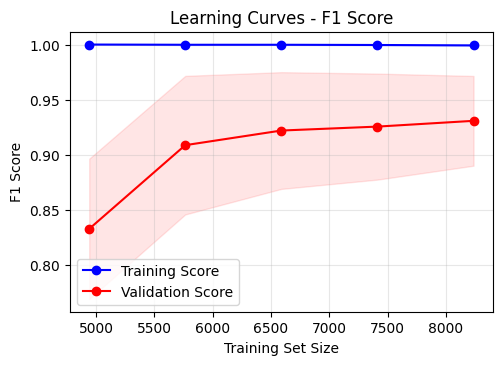

In [ ]:
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model, X_train_smote, y_train_smote, 
    cv=3, n_jobs=1, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1'
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Score', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curves - F1 Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Check convergence
final_gap = train_mean[-1] - val_mean[-1]
print(f"Final Training-Validation Gap: {final_gap:.4f}")

if final_gap > 0.1:
    print("  ⚠️ Large gap suggests overfitting")
elif final_gap > 0.05:
    print("  🔶 Moderate gap - some overfitting")
else:
    print("  ✅ Small gap - good generalization")

Current max_depth: 20
Optimal max_depth: 20
Current validation F1: 0.9306
Optimal validation F1: 0.9306


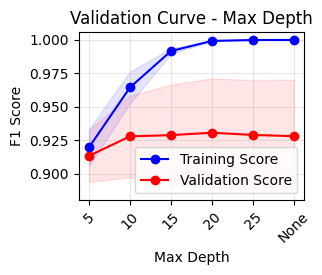

In [ ]:
param_range = [5, 10, 15, 20, 25, None]
train_scores, val_scores = validation_curve(
    RandomForestClassifier(random_state=40, n_estimators=best_rf_params['n_estimators']),
    X_train_smote, y_train_smote,
    param_name='max_depth',
    param_range=param_range,
    cv=3, scoring='f1'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot validation curve
plt.subplot(2, 2, 2)
param_range_plot = [str(p) for p in param_range]
plt.plot(param_range_plot, train_mean, 'o-', label='Training Score', color='blue')
plt.fill_between(range(len(param_range)), train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(param_range_plot, val_mean, 'o-', label='Validation Score', color='red')
plt.fill_between(range(len(param_range)), val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('Validation Curve - Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Find optimal point
best_depth_idx = np.argmax(val_mean)
current_depth = best_rf_params['max_depth']
optimal_depth = param_range[best_depth_idx]

print(f"Current max_depth: {current_depth}")
print(f"Optimal max_depth: {optimal_depth}")
print(f"Current validation F1: {val_mean[param_range.index(current_depth) if current_depth in param_range else -1]:.4f}")
print(f"Optimal validation F1: {val_mean[best_depth_idx]:.4f}")

ACCURACY:
  Train: 0.9988 ± 0.0004
  Val:   0.9333 ± 0.0589
  Gap:   0.0655
  Status: 🔶 Moderate overfitting

F1:
  Train: 0.9988 ± 0.0004
  Val:   0.9281 ± 0.0716
  Gap:   0.0708
  Status: 🔶 Moderate overfitting

PRECISION:
  Train: 0.9977 ± 0.0007
  Val:   0.9364 ± 0.0076
  Gap:   0.0614
  Status: 🔶 Moderate overfitting

RECALL:
  Train: 1.0000 ± 0.0001
  Val:   0.9304 ± 0.1291
  Gap:   0.0695
  Status: 🔶 Moderate overfitting



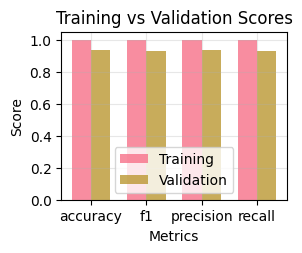

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    best_rf_model, X_train_smote, y_train_smote,
    cv=5, scoring=['accuracy', 'f1', 'precision', 'recall'],
    return_train_score=True
)

metrics = ['accuracy', 'f1', 'precision', 'recall']
stability_results = {}

for metric in metrics:
    train_scores = cv_results[f'train_{metric}']
    val_scores = cv_results[f'test_{metric}']
    
    train_mean = np.mean(train_scores)
    train_std = np.std(train_scores)
    val_mean = np.mean(val_scores)
    val_std = np.std(val_scores)
    gap = train_mean - val_mean
    
    stability_results[metric] = {
        'train_mean': train_mean,
        'train_std': train_std,
        'val_mean': val_mean,
        'val_std': val_std,
        'gap': gap
    }
    
    print(f"{metric.upper()}:")
    print(f"  Train: {train_mean:.4f} ± {train_std:.4f}")
    print(f"  Val:   {val_mean:.4f} ± {val_std:.4f}")
    print(f"  Gap:   {gap:.4f}")
    
    if gap > 0.1:
        print(f"  Status: ⚠️ High overfitting")
    elif gap > 0.05:
        print(f"  Status: 🔶 Moderate overfitting")
    else:
        print(f"  Status: ✅ Good generalization")
    print()

# Plot CV scores
plt.subplot(2, 2, 3)
metrics_plot = list(stability_results.keys())
train_means = [stability_results[m]['train_mean'] for m in metrics_plot]
val_means = [stability_results[m]['val_mean'] for m in metrics_plot]

x = np.arange(len(metrics_plot))
width = 0.35

plt.bar(x - width/2, train_means, width, label='Training', alpha=0.8)
plt.bar(x + width/2, val_means, width, label='Validation', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Training vs Validation Scores')
plt.xticks(x, metrics_plot)
plt.legend()
plt.grid(True, alpha=0.3)

TOP 10 FEATURES - STABILITY ANALYSIS:
                    Feature  Mean_Importance  CV_Importance
8                PageValues           0.4620         0.0078
0            Administrative           0.0617         0.0250
1   Administrative_Duration           0.0540         0.0466
19                Month_cos           0.0512         0.0361
7                 ExitRates           0.0510         0.0273
18                Month_sin           0.0490         0.0481
17           Total_Duration           0.0384         0.0380
5   ProductRelated_Duration           0.0353         0.0428
4            ProductRelated           0.0301         0.0289
6               BounceRates           0.0294         0.0290

Average CV of Feature Importance: 0.0442
  ✅ Low variability - stable features


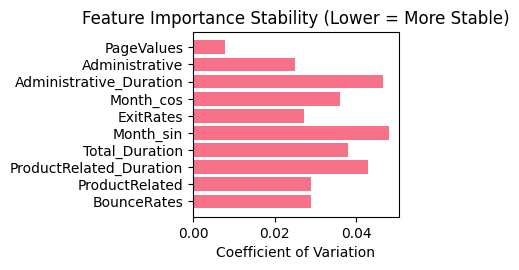

In [53]:
from sklearn.model_selection import KFold

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=40)
feature_importance_list = []

for train_idx, val_idx in kf.split(X_train_smote):
    X_fold_train = X_train_smote.iloc[train_idx]
    y_fold_train = y_train_smote.iloc[train_idx]
    
    # Train model on fold
    fold_model = RandomForestClassifier(**best_rf_params, random_state=40)
    fold_model.fit(X_fold_train, y_fold_train)
    
    feature_importance_list.append(fold_model.feature_importances_)

# Calculate stability metrics
feature_importance_array = np.array(feature_importance_list)
importance_mean = np.mean(feature_importance_array, axis=0)
importance_std = np.std(feature_importance_array, axis=0)
importance_cv = importance_std / (importance_mean + 1e-8)  # Coefficient of variation

# Create stability dataframe
stability_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Importance': importance_mean,
    'Std_Importance': importance_std,
    'CV_Importance': importance_cv
}).sort_values('Mean_Importance', ascending=False)

print("TOP 10 FEATURES - STABILITY ANALYSIS:")
print(stability_df.head(10)[['Feature', 'Mean_Importance', 'CV_Importance']].round(4))

# Plot feature importance stability
plt.subplot(2, 2, 4)
top_10_stability = stability_df.head(10)
plt.barh(range(len(top_10_stability)), top_10_stability['CV_Importance'])
plt.yticks(range(len(top_10_stability)), top_10_stability['Feature'])
plt.xlabel('Coefficient of Variation')
plt.title('Feature Importance Stability (Lower = More Stable)')
plt.gca().invert_yaxis()

# Assess stability
avg_cv = np.mean(importance_cv)
print(f"\nAverage CV of Feature Importance: {avg_cv:.4f}")
if avg_cv > 0.3:
    print("  ⚠️ High variability - possible overfitting")
elif avg_cv > 0.15:
    print("  🔶 Moderate variability")
else:
    print("  ✅ Low variability - stable features")

plt.tight_layout()
plt.show()

In [ ]:
overfitting_score = 0
total_checks = 5

# 1. Training-Test gap
if accuracy_gap > 0.1 or f1_gap > 0.1:
    overfitting_score += 2
elif accuracy_gap > 0.05 or f1_gap > 0.05:
    overfitting_score += 1

# 2. Learning curve gap
if final_gap > 0.1:
    overfitting_score += 2
elif final_gap > 0.05:
    overfitting_score += 1

# 3. CV stability
cv_gaps = [stability_results[m]['gap'] for m in metrics]
avg_cv_gap = np.mean(cv_gaps)
if avg_cv_gap > 0.1:
    overfitting_score += 2
elif avg_cv_gap > 0.05:
    overfitting_score += 1

# 4. Feature importance stability
if avg_cv > 0.3:
    overfitting_score += 2
elif avg_cv > 0.15:
    overfitting_score += 1

# Overall assessment
overfitting_percentage = (overfitting_score / (total_checks * 2)) * 100

print(f"\n📊 OVERFITTING SCORE: {overfitting_score}/{total_checks*2} ({overfitting_percentage:.1f}%)")

if overfitting_percentage >= 70:
    status = "🚨 HIGH OVERFITTING"
    color = "red"
elif overfitting_percentage >= 40:
    status = "⚠️ MODERATE OVERFITTING"  
    color = "orange"
elif overfitting_percentage >= 20:
    status = "🔶 MILD OVERFITTING"
    color = "yellow"
else:
    status = "✅ MINIMAL OVERFITTING"
    color = "green"

print(f"STATUS: {status}")

print(f"\n💡 RECOMMENDATIONS:")
if overfitting_percentage >= 50:
    print("  1. Reduce model complexity (lower max_depth, min_samples_leaf)")
    print("  2. Increase min_samples_split")
    print("  3. Use fewer features (feature selection)")
    print("  4. Collect more training data")
    print("  5. Apply stronger regularization")
elif overfitting_percentage >= 30:
    print("  1. Fine-tune regularization parameters")
    print("  2. Consider cross-validation for parameter selection")
    print("  3. Monitor performance on additional validation sets")
else:
    print("  ✅ Model shows good generalization!")
    print("  1. Current model is well-balanced")
    print("  2. Consider this model for production")

print(f"\n📈 CURRENT MODEL PERFORMANCE SUMMARY:")
print(f"  Training F1:    {train_f1:.4f}")
print(f"  Test F1:        {tuned_f1:.4f}")
print(f"  CV F1:          {best_cv_score:.4f}")
print(f"  Performance:    {'Stable' if overfitting_percentage < 30 else 'Needs attention'}")


📊 OVERFITTING SCORE: 4/10 (40.0%)
STATUS: ⚠️ MODERATE OVERFITTING

💡 RECOMMENDATIONS:
  1. Fine-tune regularization parameters
  2. Consider cross-validation for parameter selection
  3. Monitor performance on additional validation sets

📈 CURRENT MODEL PERFORMANCE SUMMARY:
  Training F1:    0.9981
  Test F1:        0.6641
  CV F1:          0.9306
  Performance:    Needs attention
